# TITANIC SURVIVAL

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [49]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
print(test.shape)
train.shape

(418, 11)


(891, 12)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Visualisation

#### Sex

Percentage of Women who survived: 74.20382165605095
Percentage of Men who survived: 18.890814558058924


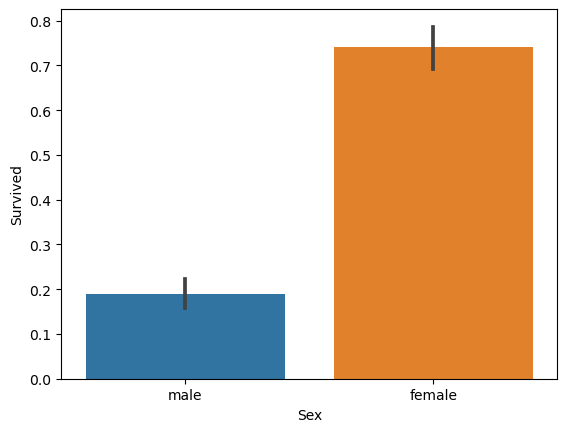

In [54]:
sns.barplot(x = 'Sex', y = 'Survived', data = train)

print('Percentage of Women who survived:', train['Survived'][train['Sex'] == 'female'].value_counts(normalize=True)[1]*100)

print('Percentage of Men who survived:', train['Survived'][train['Sex'] == 'male'].value_counts(normalize=True)[1]*100)

#### P Class

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


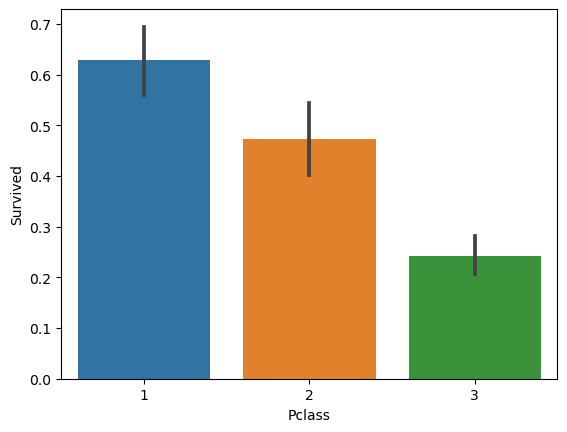

In [55]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train)

print('Percentage of Pclass = 1 who survived:', train['Survived'][train['Pclass'] == 1].value_counts(normalize=True)[1]*100)

print('Percentage of Pclass = 2 who survived:', train['Survived'][train['Pclass'] == 2].value_counts(normalize=True)[1]*100)

print('Percentage of Pclass = 3 who survived:', train['Survived'][train['Pclass'] == 3].value_counts(normalize=True)[1]*100)

### Analysing AGE

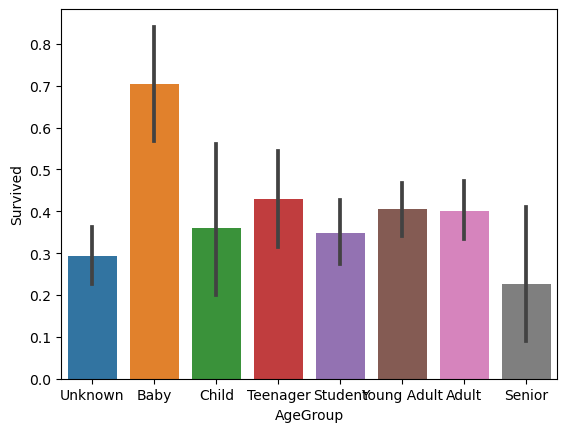

In [56]:
train.Age = train.Age.fillna(-0.5)
test.Age = train.Age.fillna(-0.5)

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]

labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

train['AgeGroup'] = pd.cut(train['Age'], bins, labels = labels)
test['AgeGroup'] = pd.cut(test['Age'], bins, labels = labels)

sns.barplot( x = 'AgeGroup', y = 'Survived', data = train)
plt.show()

In [57]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'],
      dtype='object')

In [58]:
train = train.drop(['Ticket', 'Cabin', 'Fare'] ,axis=1)
test = test.drop(['Ticket', 'Cabin', 'Fare'] ,axis=1)

# FEATURE ENGINEERING - 1

In [59]:
print("Number of people embarking in Southampton (S) :")
southampton = train[train['Embarked'] == 'S'].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C) :")
cherbourg = train[train['Embarked'] == 'C'].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q) :")
queenstown = train[train['Embarked'] == 'Q'].shape[0]
print(queenstown)

Number of people embarking in Southampton (S) :
644
Number of people embarking in Cherbourg (C) :
168
Number of people embarking in Queenstown (Q) :
77


In [60]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
AgeGroup       0
dtype: int64

In [61]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
dtype: int64

In [62]:
train = train.fillna({'Embarked' : 'S'})

In [63]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
dtype: int64

In [64]:
combine  = [train,test]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand = False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [65]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess','Lady','Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace(['Mlle'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Mme'], 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [66]:
list(train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()['Title'])

['Master', 'Miss', 'Mr', 'Mrs', 'Rare', 'Royal']

In [67]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Royal':5, 'Rare':6}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


In [70]:
mr_age = train[train['Title'] == 1]['AgeGroup'].mode()
miss_age = train[train['Title'] == 2]['AgeGroup'].mode()
mrs_age = train[train['Title'] == 3]['AgeGroup'].mode()
master_age = train[train['Title'] == 4]['AgeGroup'].mode()
royal_age = train[train['Title'] == 5]['AgeGroup'].mode()
rare_age = train[train['Title'] == 6]['AgeGroup'].mode()

age_title_map = {1: 'Young Adult', 2: 'Student', 3: 'Adult', 4: 'Baby', 5: 'Adult', 6: 'Adult'}

for i in range(len(train['AgeGroup'])):
    if train['AgeGroup'][i]  == 'Unknown':
        train['AgeGroup'][i] = age_title_map[train['Title'][i]]

for i in range(len(test['AgeGroup'])):
    if test['AgeGroup'][i]  == 'Unknown':
        test['AgeGroup'][i] = age_title_map[test['Title'][i]]


In [72]:
train.AgeGroup.unique()

['Student', 'Adult', 'Young Adult', 'Baby', 'Teenager', 'Child', 'Senior']
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']